# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy import stats
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key
params = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={params}&q="
count_one = 0
set_one = 0

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

saved_lats = []
saved_longs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        saved_lats.append(lat_lng[0])
        saved_longs.append(lat_lng[1])

# Print the city count to confirm sufficient count
len(cities)




598

In [6]:
city_list = pd.DataFrame({"City":cities, "Approx. Latitude":saved_lats, "Approx. Longitude":saved_longs})
# city_list = pd.DataFrame({"City":cities})

#save to a csv (for reference - can compare estimated coordinates to actual coordinates if there is time, which cannot be done
#easily with citipy because the references only go one way -> approx. coordinates to city name, not city name to actual 
#coordinates)

city_list.head()

,City,Approx. Latitude,Approx. Longitude
0,oranjemund,-29.829713,15.316216
1,fayaoue,-19.945822,166.617406
2,akcaabat,41.781486,39.530232
3,mataura,-63.749785,-161.202028
4,hilo,15.777117,-138.990354


In [7]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"
#city = "korla"

# Build query URL

#query_url = url + "appid=" + weather_api_key + "&q=" + city

#query_url


In [8]:
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

# Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")

In [9]:
#from pprint import pprint
#pprint(weather_json)

In [10]:
#base_url_current = "http://weather_api_key.openweathermap.org/data/2.5/weather"
#params = {"q":city_list["City"][0],"appid":weather_api_key}
#base_url_current

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
  
 
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []


# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")    

Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | hare bay
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | cedar city
Processing Record 10 of Set 1 | richards bay
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | makakilo city
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | agucadoura
Processing Record 15 of Set 1 | castro
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | xichang
Processing Record 19 of Set 1 | alta floresta
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | nanortalik
Processing Record 22 of Set 1 | yellowknife
Processing Record 2

Processing Record 41 of Set 4 | mae sai
Processing Record 42 of Set 4 | nome
Processing Record 43 of Set 4 | north bend
Processing Record 44 of Set 4 | morros
Processing Record 45 of Set 4 | cabo san lucas
Processing Record 46 of Set 4 | fort frances
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | aswan
Processing Record 49 of Set 4 | birin
Processing Record 1 of Set 5 | rundu
Processing Record 2 of Set 5 | esperance
Processing Record 3 of Set 5 | kousseri
Processing Record 4 of Set 5 | sao gabriel da cachoeira
Processing Record 5 of Set 5 | muroto
Processing Record 6 of Set 5 | oranjemund
Processing Record 7 of Set 5 | qena
Processing Record 8 of Set 5 | thompson
City not found. Skipping...
Processing Record 9 of Set 5 | port lincoln
Processing Record 10 of Set 5 | sumenep
Processing Record 11 of Set 5 | ginir
Processing Record 12 of Set 5 | labuhan
Processing Record 13 of Set 5 | honningsvag
Processing Record 14 of Set 5 | komsomolskiy
Processing Record 15 of Set

Processing Record 25 of Set 8 | verkhnyaya sinyachikha
Processing Record 26 of Set 8 | vilhena
Processing Record 27 of Set 8 | russell
Processing Record 28 of Set 8 | yerbogachen
Processing Record 29 of Set 8 | nizhnyaya salda
City not found. Skipping...
City not found. Skipping...
Processing Record 30 of Set 8 | narsaq
Processing Record 31 of Set 8 | coihaique
Processing Record 32 of Set 8 | phan rang
Processing Record 33 of Set 8 | aviles
Processing Record 34 of Set 8 | raga
Processing Record 35 of Set 8 | mutoko
Processing Record 36 of Set 8 | ostrovnoy
Processing Record 37 of Set 8 | nemuro
Processing Record 38 of Set 8 | shimoda
Processing Record 39 of Set 8 | shunyi
Processing Record 40 of Set 8 | baruun-urt
Processing Record 41 of Set 8 | chuy
Processing Record 42 of Set 8 | rocky mountain house
Processing Record 43 of Set 8 | high level
City not found. Skipping...
Processing Record 44 of Set 8 | sakakah
Processing Record 45 of Set 8 | codajas
Processing Record 46 of Set 8 | hus

In [35]:
print(len(city_two))
print(len(cloudinesses))
print(len(dates))
print(len(humidities))
print(len(lats))
print(len(lngs))
print(len(max_temps))
print(len(wind_speeds))
print(len(countries))


530
530
530
530
530
530
530
530
530


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
weather_dict =  {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atuona,32,PF,1666558065,74,-9.8000,-139.0333,77.11,16.98
1,hare bay,23,US,1666558361,50,30.6710,-97.2731,87.85,22.82
2,vaini,20,TO,1666558361,69,-21.2000,-175.2000,75.36,13.80
3,ushuaia,75,AR,1666558162,71,-54.8000,-68.3000,49.66,8.05
4,bredasdorp,83,ZA,1666557708,84,-34.5322,20.0403,63.09,10.56


In [39]:
# output data to csv
weather_df.to_csv(output_data_file)

In [40]:
weather_df['Humidity'].count()



530

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
weather_df.loc[weather_df['Humidity'] < 101]
 
weather_df.count()

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind Speed    530
dtype: int64

In [42]:
checkit = weather_df["Humidity"].describe(include = 'all')
checkit

count    530.000000
mean      71.184906
std       20.933592
min        6.000000
25%       60.000000
50%       76.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [43]:
#  Get the indices of cities that have humidity over 100%.
# not necessary as can see max value is 100

indices = list(np.where(weather_df["Humidity"]>100)[0])


In [44]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = weather_df[weather_df["Humidity"] < 101]
clean_city_data_df.count()

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind Speed    530
dtype: int64

In [81]:
north_df = weather_df.loc[pd.to_numeric(clean_city_data_df["Lat"]).astype(float) > 0, :]

south_df = weather_df.loc[pd.to_numeric(clean_city_data_df["Lat"]).astype(float) < 0, :]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

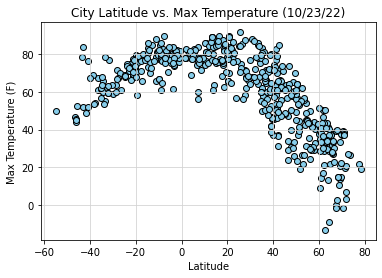

In [86]:
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/23/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("charts/plot1.png")
plt.show()

## Latitude vs. Humidity Plot

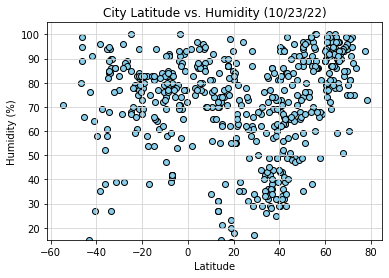

In [87]:
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/23/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("charts/plot2.png")
plt.show()

## Latitude vs. Cloudiness Plot

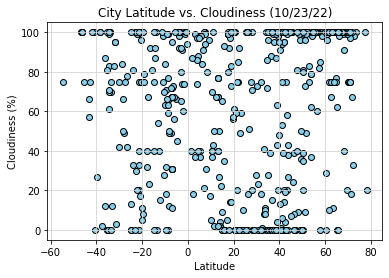

In [88]:
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/23/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("charts/plot3.png")
plt.show()

## Latitude vs. Wind Speed Plot

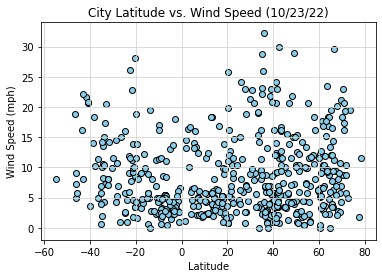

In [89]:
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/23/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("charts/plot4.png")
plt.show()

## Linear Regression

Regression line equation is: y = -0.95x + 94.57
The r-squared is: -0.8374169791153427


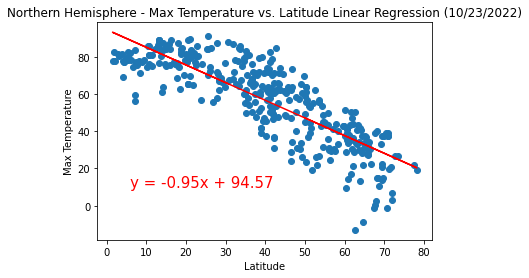

In [112]:
## Latitude vs. Temperature Plot
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature") 
plt.title("Northern Hemisphere - Max Temperature vs. Latitude Linear Regression (10/23/2022)")
plt.savefig("charts/linearreg1_North.png")
print(f"The r-squared is: {rvalue}")

plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.55x + 82.13
The r-squared is: 0.7441700701619394


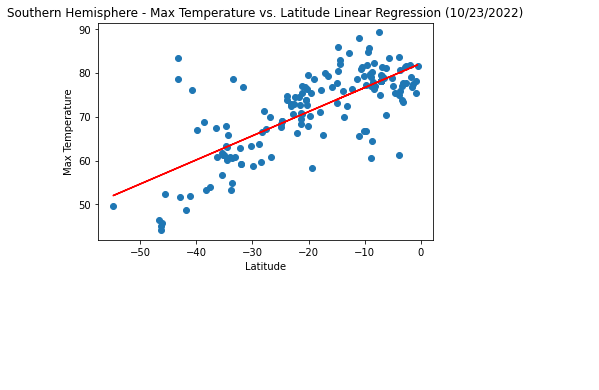

In [113]:
## Latitude vs. Temperature Plot
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature") 
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression (10/23/2022)")
print(f"The r-squared is: {rvalue}")
plt.savefig("charts/linearreg1_South.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.34x + 56.78
The r-squared is: 0.3037622141973201


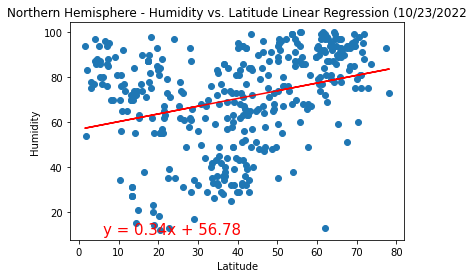

In [114]:
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity") 
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression (10/23/2022")
plt.savefig("charts/linearreg2_North.png")
print(f"The r-squared is: {rvalue}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 73.65
The r-squared is: 0.02803712974865778


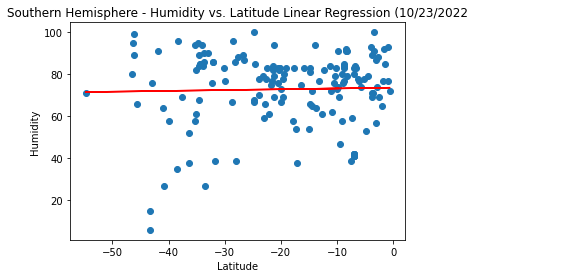

In [117]:
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity") 
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression (10/23/2022")
plt.savefig("charts/linearreg2_South.png")
print(f"The r-squared is: {rvalue}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.58x + 36.11
The r-squared is: 0.27858315638507775


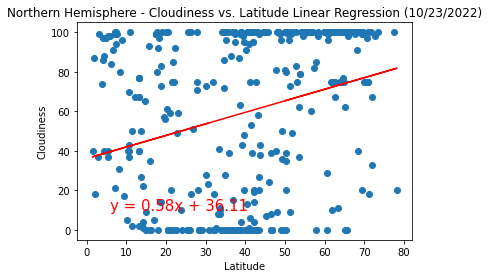

In [118]:
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness") 
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression (10/23/2022)")
plt.savefig("charts/linearreg3_North.png")
print(f"The r-squared is: {rvalue}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.09x + 65.6
The r-squared is: 0.0360653303117668


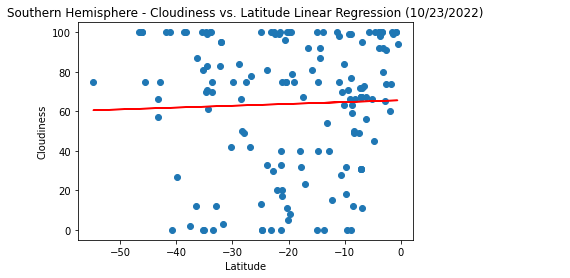

In [119]:
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness") 
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression (10/23/2022)")
plt.savefig("charts/linearreg3_South.png")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.05x + 6.72
The r-squared is: 0.1418337602757723


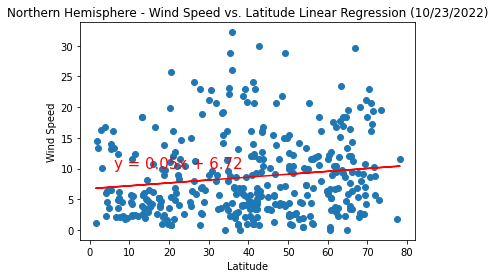

In [120]:
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed") 
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression (10/23/2022)")
plt.savefig("charts/linearreg4_North.png")
print(f"The r-squared is: {rvalue}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.18x + 4.41
The r-squared is: -0.4013438901066235


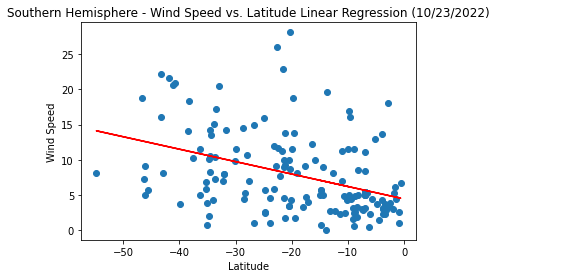

In [121]:
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed") 
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression (10/23/2022)")
plt.savefig("charts/linearreg4_South.png")
print(f"The r-squared is: {rvalue}")

plt.show()